In [1]:
%load_ext autoreload
%autoreload 2

import chess
import pickle
import numpy as np
from tensorflow import keras
from cam_chess import *

Init Plugin
Init Graph Optimizer
Init Kernel


In [5]:
game = pickle.load(open('small_game.pkl', 'rb'))
probs = pickle.load(open('small_game_probs.pkl', 'rb'))
moves = ['e4', 'e5', 'Nf3', 'd6', 'Bc4', 'Be7', 'd3', 'Nf6', 'Bg5', 'h6']

We need to know candidates and extract relevant probs.

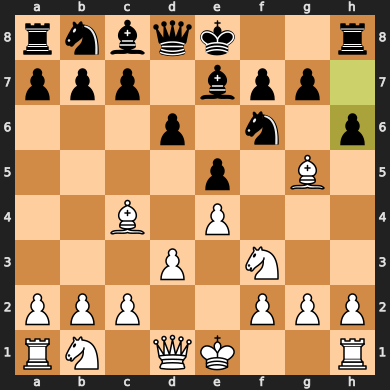

In [6]:
board = chess.Board()
for move in moves:
    board.push_san(move)
board

# Predictions based on possible moves

Since we made no complex moves yet all of them should lead to probs close to 0 followed by 1.

In [33]:
board = chess.Board()

for n, move in enumerate(moves):
    legal_moves = [(str(m)[:2], str(m)[2:]) for m in board.legal_moves]
    print(move, legal_moves[np.argmax([(1 - probs[n+1][a]) + probs[n+1][b] for a, b in legal_moves])])
    board.push_san(move)

e4 ('e2', 'e4')
e5 ('e7', 'e5')
Nf3 ('g1', 'f3')
d6 ('d7', 'd5')
Bc4 ('f1', 'c4')
Be7 ('f8', 'e7')
d3 ('d2', 'd3')
Nf6 ('g8', 'f6')
Bg5 ('c1', 'g5')
h6 ('h7', 'h6')


We have one failure at d6 where model predicted d5 instead. Let's hope that decent model will learn to deal with that.

# Playing a quick game

In [ ]:
model = keras.models.load_model('first_model.h5')

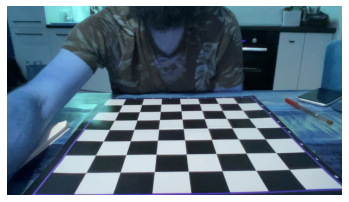

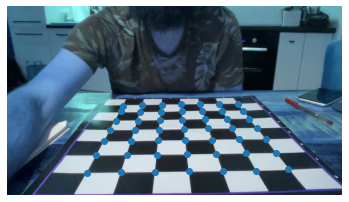

In [34]:
empty = capture()
corners = detect_checkerboard(empty)

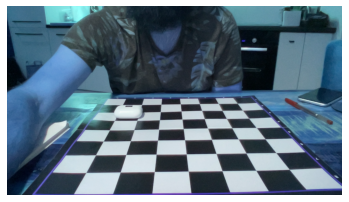

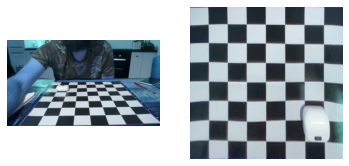

{'a1': array([[[177, 189, 218],
         [180, 194, 218],
         [180, 195, 216],
         ...,
         [169, 185, 193],
         [158, 174, 180],
         [114, 129, 133]],
 
        [[179, 190, 220],
         [179, 192, 217],
         [180, 194, 216],
         ...,
         [154, 169, 177],
         [136, 151, 157],
         [105, 120, 124]],
 
        [[178, 189, 220],
         [178, 191, 217],
         [180, 193, 217],
         ...,
         [137, 152, 159],
         [120, 135, 140],
         [106, 120, 125]],
 
        ...,
 
        [[ 48,  58,  86],
         [ 48,  59,  83],
         [ 45,  58,  78],
         ...,
         [ 90,  87, 112],
         [101, 101, 124],
         [121, 124, 145]],
 
        [[ 48,  58,  86],
         [ 47,  59,  82],
         [ 43,  56,  76],
         ...,
         [ 91,  88, 113],
         [ 98,  99, 122],
         [119, 121, 143]],
 
        [[ 48,  59,  87],
         [ 45,  58,  82],
         [ 41,  55,  75],
         ...,
         [ 90,  87, 11

In [37]:
capture_pipeline(corners)

In [11]:
four_corners = [corners[0][0], corners[6][0], corners[-1][0], corners[42][-1]]

In [25]:
bottom_right = np.argmin([a + b for a, b in four_corners])
top_left = np.argmax([a + b for a, b in four_corners])
top_right = np.argmax([c[1] if i not in [bottom_right, top_left] else 0
                       for i, c in enumerate(four_corners)])
bottom_left = [i for i in range(4) if i not in [bottom_right, top_left, top_right]][0]

four_corners[bottom_left], four_corners[bottom_right],
four_corners[bottom_left], four_corners[top_right]

0

In [22]:
top_right

1

In [ ]:
four_corners

In [39]:
board = chess.Board()

Now we wait for the move.

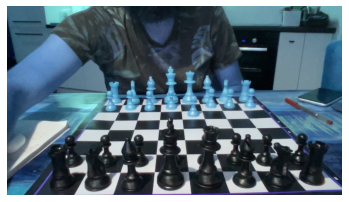

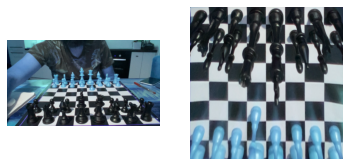

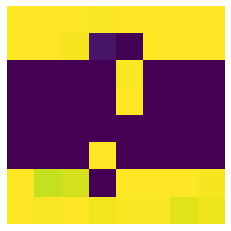

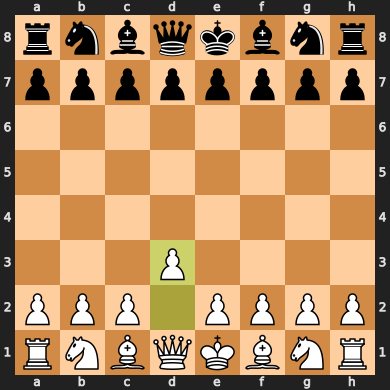

In [43]:
fields = capture_pipeline(corners)
probs = predict(model, fields)

legal_moves = [(str(m)[:2], str(m)[2:]) for m in board.legal_moves]
probs_combo = [probs[b] - probs[a] for a, b in legal_moves]
move = list(board.legal_moves)[np.argmax(probs_combo)]

board.push_uci(str(move))
board

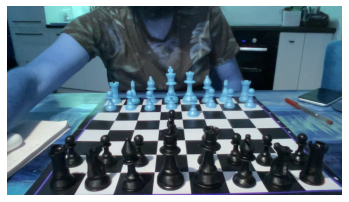

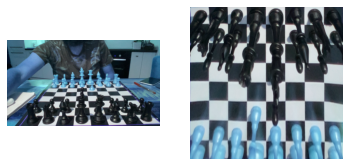

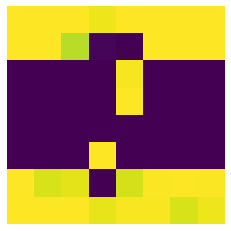

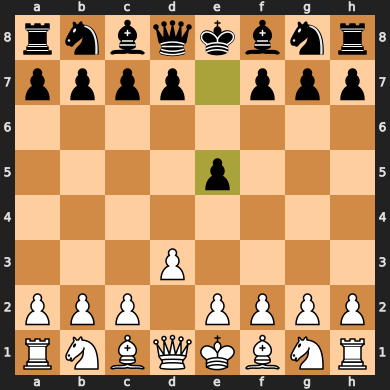

In [44]:
fields = capture_pipeline(corners)
probs = predict(model, fields)

legal_moves = [(str(m)[:2], str(m)[2:]) for m in board.legal_moves]
probs_combo = [probs[b] - probs[a] for a, b in legal_moves]
move = list(board.legal_moves)[np.argmax(probs_combo)]

board.push_uci(str(move))
board

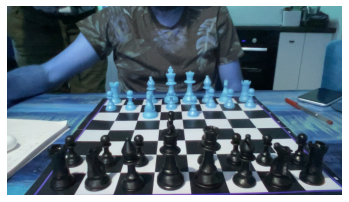

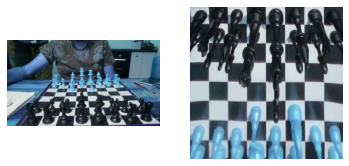

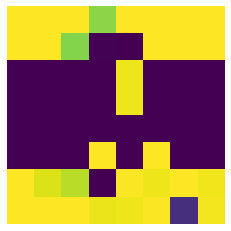

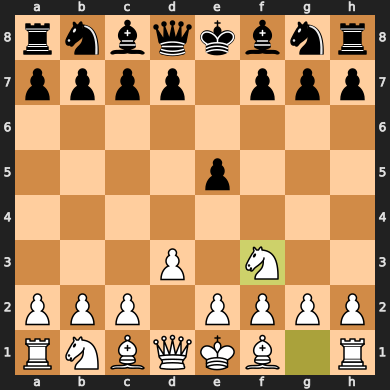

In [45]:
fields = capture_pipeline(corners)
probs = predict(model, fields)

legal_moves = [(str(m)[:2], str(m)[2:]) for m in board.legal_moves]
probs_combo = [probs[b] - probs[a] for a, b in legal_moves]
move = list(board.legal_moves)[np.argmax(probs_combo)]

board.push_uci(str(move))
board

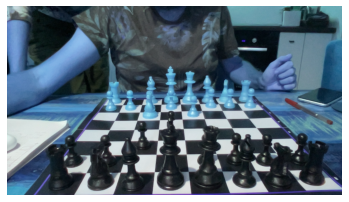

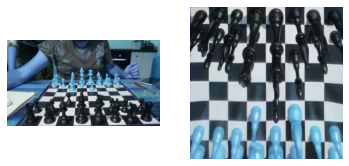

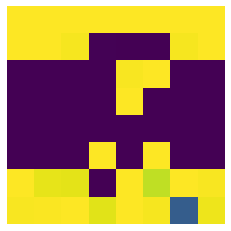

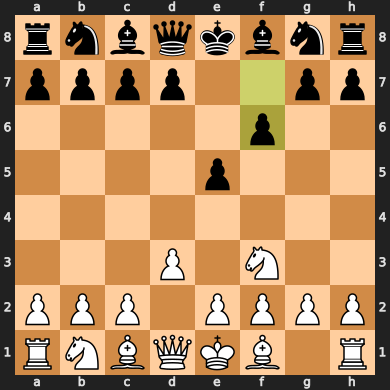

In [46]:
fields = capture_pipeline(corners)
probs = predict(model, fields)

legal_moves = [(str(m)[:2], str(m)[2:]) for m in board.legal_moves]
probs_combo = [probs[b] - probs[a] for a, b in legal_moves]
move = list(board.legal_moves)[np.argmax(probs_combo)]

board.push_uci(str(move))
board

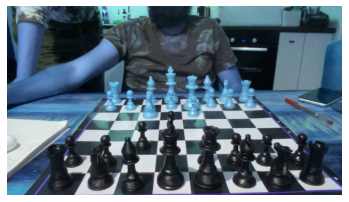

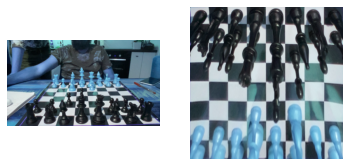

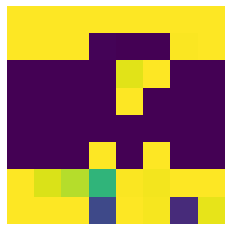

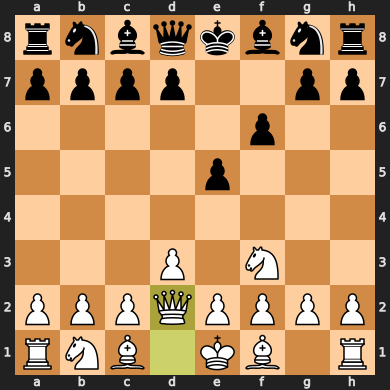

In [47]:
fields = capture_pipeline(corners)
probs = predict(model, fields)

legal_moves = [(str(m)[:2], str(m)[2:]) for m in board.legal_moves]
probs_combo = [probs[b] - probs[a] for a, b in legal_moves]
move = list(board.legal_moves)[np.argmax(probs_combo)]

board.push_uci(str(move))
board

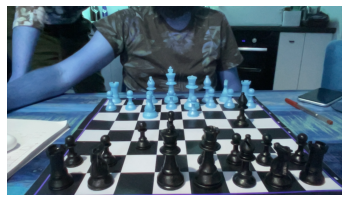

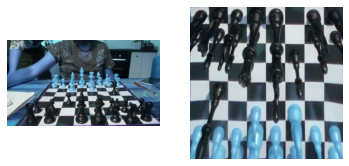

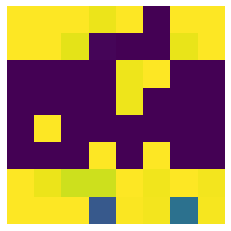

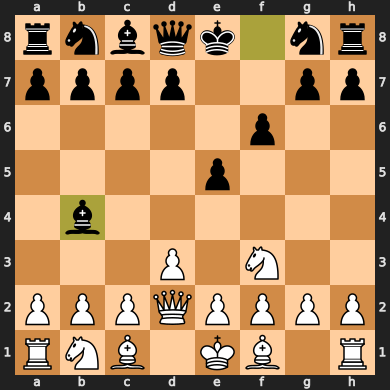

In [48]:
fields = capture_pipeline(corners)
probs = predict(model, fields)

legal_moves = [(str(m)[:2], str(m)[2:]) for m in board.legal_moves]
probs_combo = [probs[b] - probs[a] for a, b in legal_moves]
move = list(board.legal_moves)[np.argmax(probs_combo)]

board.push_uci(str(move))
board

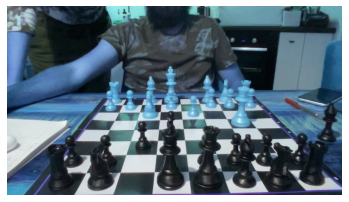

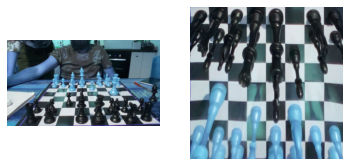

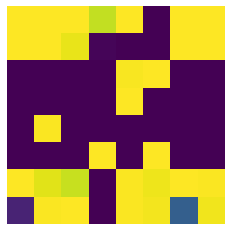

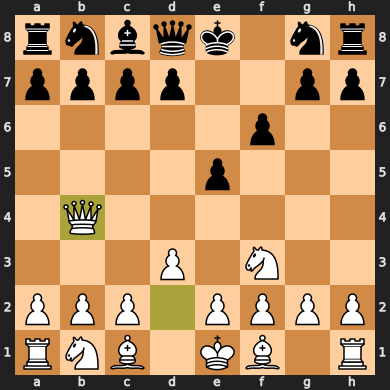

In [49]:
fields = capture_pipeline(corners)
probs = predict(model, fields)

legal_moves = [(str(m)[:2], str(m)[2:]) for m in board.legal_moves]
probs_combo = [probs[b] - probs[a] for a, b in legal_moves]
move = list(board.legal_moves)[np.argmax(probs_combo)]

board.push_uci(str(move))
board

Note, that in real game there are situations where a figure might be able to attack two pieces at the same time. If oponent does not move any of those figure we are in trouble since figure presence is not enough to come up with definitive conclusion. This could be resolved by having model that predicts figure color instead. Since we have 32 empty squares and only 16 figures of single color we can augment them by adding their mirror images along vertical axis. Looking at the images quickly reveals that this task should be quite simple for the model. 

TODO:
- update labeling functions
- relabel
- retrain the model
- update gaming logic

## Fixes for 3 class case

### is_filled

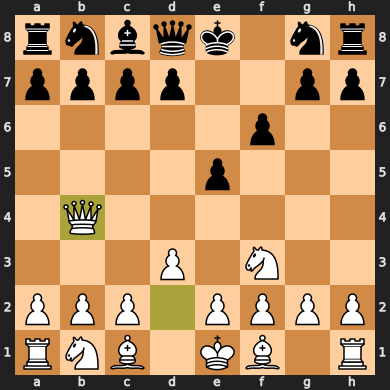

In [52]:
board

In [72]:
def group_by_value(mapping: dict):
    v = {}
    for key, value in sorted(mapping.items()):
        v.setdefault(value, []).append(key)
    return v


def piece_to_str(piece):
    if not piece:
        return 'empty'
    if str(piece) in 'PQNRBK':
        return 'white'
    return 'black'


group_by_value({chess.square_name(i): piece_to_str(board.piece_map().get(i, '')) for i in range(64)})

{'white': ['a1',
  'a2',
  'b1',
  'b2',
  'b4',
  'c1',
  'c2',
  'd3',
  'e1',
  'e2',
  'f1',
  'f2',
  'f3',
  'g2',
  'h1',
  'h2'],
 'empty': ['a3',
  'a4',
  'a5',
  'a6',
  'b3',
  'b5',
  'b6',
  'c3',
  'c4',
  'c5',
  'c6',
  'd1',
  'd2',
  'd4',
  'd5',
  'd6',
  'e3',
  'e4',
  'e6',
  'e7',
  'f4',
  'f5',
  'f7',
  'f8',
  'g1',
  'g3',
  'g4',
  'g5',
  'g6',
  'h3',
  'h4',
  'h5',
  'h6'],
 'black': ['a7',
  'a8',
  'b7',
  'b8',
  'c7',
  'c8',
  'd7',
  'd8',
  'e5',
  'e8',
  'f6',
  'g7',
  'g8',
  'h7',
  'h8']}

Now we are back to data collection step.